# Step 5: Comparing my own model's performance with sklearn's

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from helper_functions import calculate_mse
from helper_functions import calculate_rmse
from helper_functions import calculate_mae
from helper_functions import calculate_r2
from helper_functions import regression_metrics
from helper_functions import plot_actual_vs_predicted
from helper_functions import print_summary_statistics
from helper_functions import plot_distribution
from helper_functions import plot_histogram

In [2]:
current_dir = os.getcwd()

In [3]:
for dirpath, dirname, filenames in os.walk(current_dir):
    for filename in filenames:
        print(filename)

creating_dataframe.ipynb
data_analysis.ipynb
data_preprocessing.ipynb
dt_and_rf_from_scratch.ipynb
helper_functions.py
ordered_split.ipynb
sklearn_dt_and_rf.ipynb
stratifying_rul.ipynb
using_TimeSeriesSplit.ipynb
creating_dataframe-checkpoint.ipynb
data_analysis-checkpoint.ipynb
data_preprocessing-checkpoint.ipynb
dt_and_rf_from_scratch-checkpoint.ipynb
helper_functions-checkpoint.py
ordered_split-checkpoint.ipynb
sklearn_dt_and_rf-checkpoint.ipynb
stratifying_rul-checkpoint.ipynb
using_TimeSeriesSplit-checkpoint.ipynb
helper_functions.cpython-311.pyc


In [4]:
df = pd.read_csv('../dataset/failed_hdds_with_rul.csv')

In [5]:
df.shape

(18588, 31)

In [6]:
df.head()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,...,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,date_diff_days
0,4000787030016,0,119.0,208663312.0,92.0,0.0,100.0,9.0,100.0,0.0,...,7273.0,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0,26
1,12000138625024,0,79.0,155920208.0,98.0,0.0,100.0,2.0,100.0,24.0,...,633.0,40.0,40.0,100.0,88.0,100.0,88.0,200.0,0.0,26
2,8001563222016,0,77.0,54823024.0,98.0,0.0,100.0,2.0,100.0,0.0,...,14936.0,29.0,29.0,100.0,0.0,100.0,0.0,200.0,0.0,52
3,12000138625024,0,84.0,235330528.0,94.0,0.0,100.0,5.0,100.0,0.0,...,1501.0,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0,83
4,8001563222016,0,67.0,240427784.0,95.0,0.0,100.0,4.0,100.0,3896.0,...,14353.0,38.0,38.0,100.0,0.0,100.0,0.0,200.0,0.0,27


### Splitting data

In [5]:
X = df.drop(['date_diff_days'], axis=1).values

In [6]:
y = df['date_diff_days'].values

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Sklearn's decision tree regressor

CPU times: total: 31.2 ms
Wall time: 46.3 ms


{'simple tree MSE': 416.56716108923246,
 'simple tree RMSE': 20.409976998743346,
 'simple tree MAE': 16.975422685654866,
 'simple tree R2 score': 0.06248898603904607}

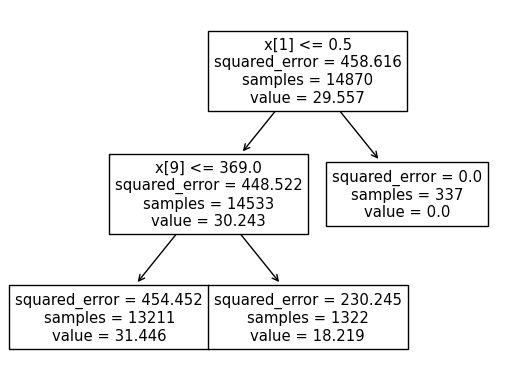

In [68]:
%%time

dtr = DecisionTreeRegressor(max_depth=2, min_samples_split=2)
dtr.fit(X_train, y_train)
plot_tree(dtr)
y_pred = dtr.predict(X_test)

regression_metrics(y_test, y_pred, model_name='simple tree')

### Re-training and testing with a randomly chosen reasonable depth

In [89]:
%%time

dtr = DecisionTreeRegressor(max_depth=40, min_samples_split=2, random_state=0)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

regression_metrics(y_test, y_pred, model_name='Decision Tree')

CPU times: total: 141 ms
Wall time: 156 ms


{'Decision Tree MSE': 22.170925228617538,
 'Decision Tree RMSE': 4.708601196599425,
 'Decision Tree MAE': 2.0059171597633134,
 'Decision Tree R2 score': 0.9501029160887666}

### Applying hyperparamater tuning to find the most optimal parameter values

In [23]:
%%time

hyperparameter_values = {'max_depth': [], 'min_samples_split': [], 'mse': [], 'rmse': [], 'mae': [], 'r2': []}

for max_depth in range(2, 101, 2):
    for min_samples_split in range(2, 21, 2):
        tree = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, random_state=0)
        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_test)
        
        mse = calculate_mse(y_test, y_pred)
        rmse = calculate_rmse(y_test, y_pred)
        mae = calculate_mae(y_test, y_pred)
        r2 = calculate_r2(y_test, y_pred)
        
        hyperparameter_values['max_depth'].append(max_depth)
        hyperparameter_values['min_samples_split'].append(min_samples_split)
        hyperparameter_values['mse'].append(mse)
        hyperparameter_values['rmse'].append(rmse)
        hyperparameter_values['mae'].append(mae)
        hyperparameter_values['r2'].append(r2)
        
hyperparameter_df = pd.DataFrame(hyperparameter_values)
hyperparameter_df.sort_values('rmse').head()

CPU times: total: 55.3 s
Wall time: 1min 2s


,max_depth,min_samples_split,mse,rmse,mae,r2
110,24,2,21.713609,4.659786,1.996433,0.951132
130,28,2,21.933827,4.683356,1.971965,0.950637
410,84,2,22.170925,4.708601,2.005917,0.950103
160,34,2,22.170925,4.708601,2.005917,0.950103
210,44,2,22.170925,4.708601,2.005917,0.950103


In [24]:
hyperparameter_df.sort_values('r2', ascending=False).head()

,max_depth,min_samples_split,mse,rmse,mae,r2
110,24,2,21.713609,4.659786,1.996433,0.951132
130,28,2,21.933827,4.683356,1.971965,0.950637
250,52,2,22.170925,4.708601,2.005917,0.950103
410,84,2,22.170925,4.708601,2.005917,0.950103
460,94,2,22.170925,4.708601,2.005917,0.950103


### Using GridSearchCV for hyperparameter tuning

In [25]:
%%time

param_dist = {
    'max_depth': np.arange(2, 101, 2),
    'min_samples_split': np.arange(2, 21, 2)
}

dt = DecisionTreeRegressor(random_state=0)
grid_search = GridSearchCV(dt, param_grid=param_dist, scoring='r2', n_jobs=-1, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

regression_metrics(y_test, y_pred_best, model_name='Tuned tree')

Best Hyperparameters: {'max_depth': 26, 'min_samples_split': 4}
CPU times: total: 2.69 s
Wall time: 1min 4s


{'Tuned tree MSE': 22.835788507279005,
 'Tuned tree RMSE': 4.778680624113627,
 'Tuned tree MAE': 2.1645163694114746,
 'Tuned tree R2 score': 0.9486065987965118}

### Using RandomizedSearchCV for hyperparameter tuning

In [26]:
%%time

param_dist = {
    'max_depth': np.arange(2, 101, 2),
    'min_samples_split': np.arange(2, 21, 2)
}

tree = DecisionTreeRegressor(random_state=0)
random_search = RandomizedSearchCV(tree, param_distributions=param_dist, n_iter=50, scoring='r2', n_jobs=-1, cv=5, random_state=0)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

regression_metrics(y_test, y_pred_best, model_name='Randomised Tuned Tree')

Best Hyperparameters: {'min_samples_split': 2, 'max_depth': 52}
CPU times: total: 484 ms
Wall time: 5.87 s


{'Randomised Tuned Tree MSE': 22.170925228617538,
 'Randomised Tuned Tree RMSE': 4.708601196599425,
 'Randomised Tuned Tree MAE': 2.0059171597633134,
 'Randomised Tuned Tree R2 score': 0.9501029160887666}

### Re-training and testing with the best hyperparameters

In [27]:
%%time

dtr = DecisionTreeRegressor(max_depth=24, min_samples_split=2, random_state=0)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

regression_metrics(y_test, y_pred_dtr, model_name='Best Decision Tree')

CPU times: total: 93.8 ms
Wall time: 161 ms


{'Best Decision Tree MSE': 21.713608792108754,
 'Best Decision Tree RMSE': 4.659786346186781,
 'Best Decision Tree MAE': 1.996433129881893,
 'Best Decision Tree R2 score': 0.9511321359508683}

### Plotting actual vs predicted values

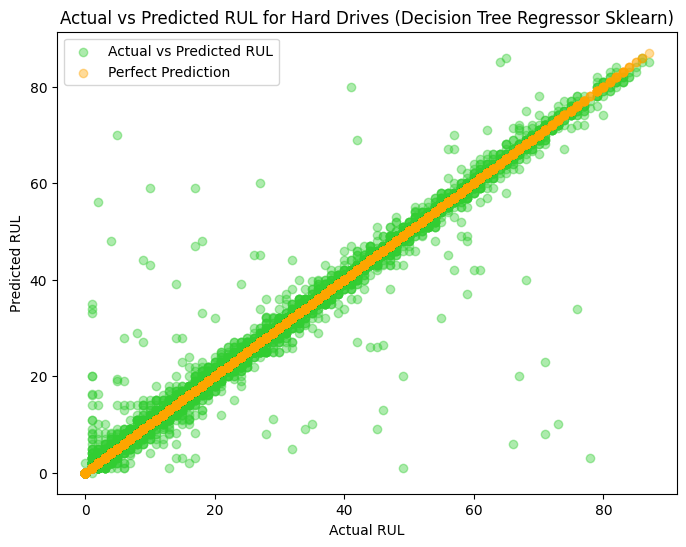

In [29]:
plot_actual_vs_predicted(y_test, y_pred_dtr, title='Actual vs Predicted RUL for Hard Drives (Decision Tree Regressor Sklearn)')

In [32]:
print_summary_statistics(values=y_test, label='actual values')

Summary statistics for actual values:

Minimum value: 0
Mean: 29.174018289402905
Median: 25.0
Standard Deviation: 21.079209782076326
Maximum value: 87


In [31]:
print_summary_statistics(values=y_pred_dtr, label='predictions')

Summary statistics for predictions:

Minimum value: 0.0
Mean: 29.285903204962512
Median: 25.0
Standard Deviation: 20.943599967660315
Maximum value: 86.0


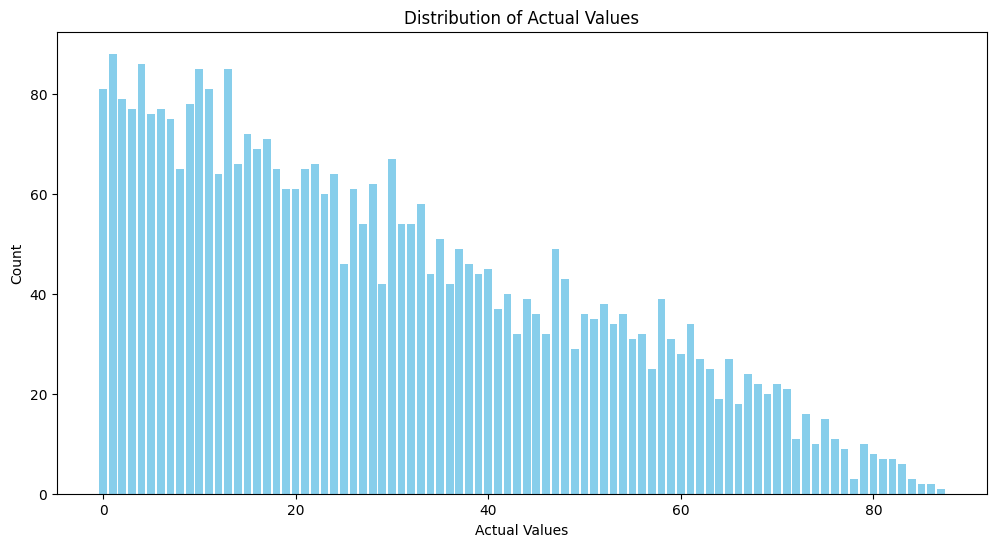

In [34]:
plot_distribution(y_test, title='Distribution of Actual Values', xlabel='Actual Values', ylabel='Count')

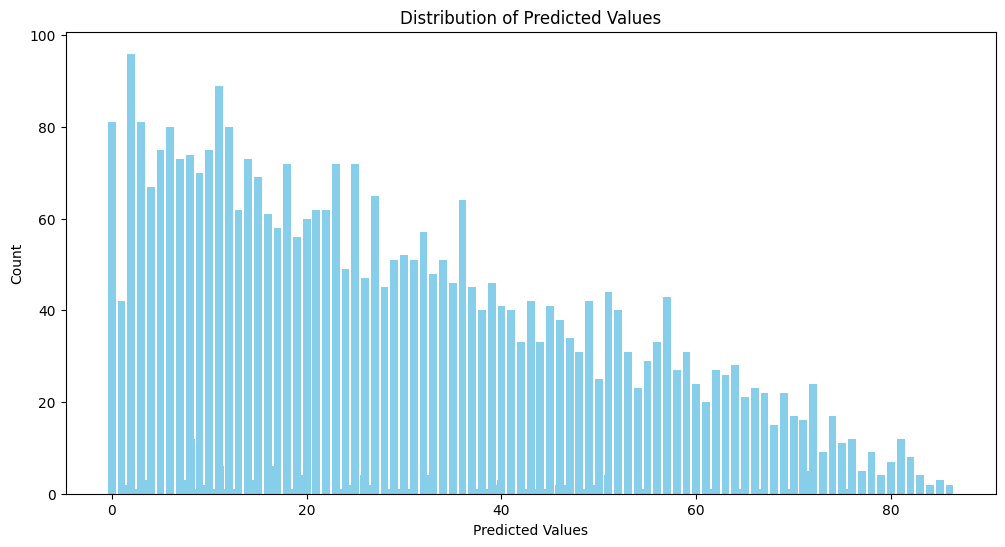

In [38]:
plot_distribution(y_pred_dtr, title='Distribution of Predicted Values', xlabel='Predicted Values', ylabel='Count')

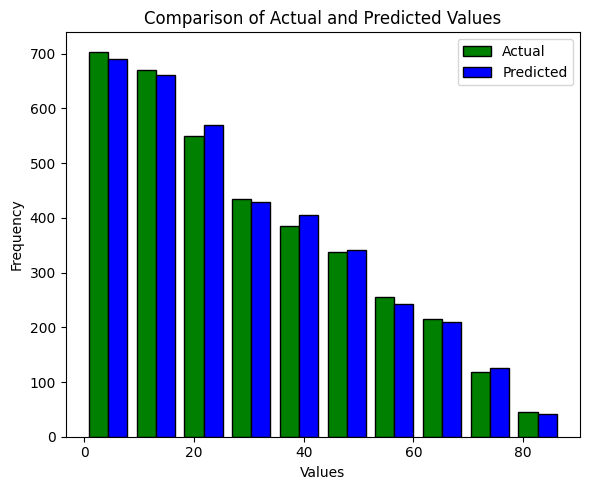

In [41]:
plot_histogram(y_test, y_pred_dtr)

### Sklearn's random forest regressor without feature selection

In [96]:
%%time

rfr = RandomForestRegressor(n_estimators=20, max_depth=40, min_samples_split=2, random_state=0)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

regression_metrics(y_test, y_pred_rfr, model_name='initial random forest')

CPU times: total: 2.23 s
Wall time: 2.33 s


{'initial random forest MSE': 10.243942143907848,
 'initial random forest RMSE': 3.200615900714712,
 'initial random forest MAE': 1.7445578566732414,
 'initial random forest R2 score': 0.9769453536347403}

### With feature selection

In [100]:
%%time

rfr = RandomForestRegressor(n_estimators=20, max_depth=40, min_samples_split=2, max_features='sqrt', random_state=0)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

regression_metrics(y_test, y_pred_rfr, model_name='random forest with feature selection')

CPU times: total: 531 ms
Wall time: 611 ms


{'random forest with feature selection MSE': 19.484353294707176,
 'random forest with feature selection RMSE': 4.414108437126027,
 'random forest with feature selection MAE': 2.7244484468522927,
 'random forest with feature selection R2 score': 0.9561492178933868}

### Using RandomizedSearchCV for hyperparameter tuning

In [106]:
%%time

param_dist = {
    'n_estimators': np.arange(2, 101, 2),
    'max_depth': np.arange(2, 101, 2),
    'min_samples_split': np.arange(2, 21, 2)
}

forest = RandomForestRegressor(random_state=0)
random_search = RandomizedSearchCV(forest, param_distributions=param_dist, n_iter=50, scoring='r2', n_jobs=-1, cv=5, random_state=0)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

regression_metrics(y_test, y_pred_best, model_name='Hyperparameter Tuned Forest')

Best Hyperparameters: {'n_estimators': 88, 'min_samples_split': 2, 'max_depth': 70}
CPU times: total: 13.3 s
Wall time: 4min 16s


{'Hyperparameter Tuned Forest MSE': 9.254783499089097,
 'Hyperparameter Tuned Forest RMSE': 3.042167565912354,
 'Hyperparameter Tuned Forest MAE': 1.6106094129258466,
 'Hyperparameter Tuned Forest R2 score': 0.9791715183704518}

results for the above code:
    
1st run:  
    
Best Hyperparameters: {'n_estimators': 88, 'min_samples_split': 2, 'max_depth': 70}
CPU times: total: 13.8 s
Wall time: 4min 18s

{'Hyperparameter Tuned Forest MSE': 9.237063850847381,
 'Hyperparameter Tuned Forest RMSE': 3.0392538312630917,
 'Hyperparameter Tuned Forest MAE': 1.6144182728208076,
 'Hyperparameter Tuned Forest R2 score': 0.979211397571075}
 

 
 
 2nd run:
 
 
 Best Hyperparameters: {'n_estimators': 88, 'min_samples_split': 2, 'max_depth': 70}
CPU times: total: 13.3 s
Wall time: 4min 16s

{'Hyperparameter Tuned Forest MSE': 9.254783499089097,
 'Hyperparameter Tuned Forest RMSE': 3.042167565912354,
 'Hyperparameter Tuned Forest MAE': 1.6106094129258466,
 'Hyperparameter Tuned Forest R2 score': 0.9791715183704518}

In [102]:
top_results_indices = np.argsort(random_search.cv_results_['rank_test_score'])[:5]

In [103]:
top_results_indices

array([40, 26, 33, 17,  3], dtype=int64)

In [104]:
print("Top 5 Hyperparameter Sets:")
for i, index in enumerate(top_results_indices, 1):
    params = {key[5:]: random_search.cv_results_[key][index] for key in random_search.cv_results_.keys() if key.startswith('param_')}
    score = random_search.cv_results_['mean_test_score'][index]
    print(f"Rank {i}: Hyperparameters: {params}, R2 Score: {score:.4f}")

Top 5 Hyperparameter Sets:
Rank 1: Hyperparameters: {'_n_estimators': 88, '_min_samples_split': 2, '_max_depth': 70}, R2 Score: 0.9686
Rank 2: Hyperparameters: {'_n_estimators': 74, '_min_samples_split': 2, '_max_depth': 26}, R2 Score: 0.9681
Rank 3: Hyperparameters: {'_n_estimators': 100, '_min_samples_split': 4, '_max_depth': 32}, R2 Score: 0.9666
Rank 4: Hyperparameters: {'_n_estimators': 80, '_min_samples_split': 4, '_max_depth': 70}, R2 Score: 0.9661
Rank 5: Hyperparameters: {'_n_estimators': 98, '_min_samples_split': 6, '_max_depth': 80}, R2 Score: 0.9624


### Re-training and testing with the best hyperparameters

In [109]:
%%time

rfr = RandomForestRegressor(n_estimators=88, max_depth=70, min_samples_split=2, random_state=0)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

regression_metrics(y_test, y_pred_rfr, model_name='Best Random Forest')

CPU times: total: 8.98 s
Wall time: 10.2 s


{'Best Random Forest MSE': 9.254783499089097,
 'Best Random Forest RMSE': 3.042167565912354,
 'Best Random Forest MAE': 1.6106094129258466,
 'Best Random Forest R2 score': 0.9791715183704518}

### Plotting actual vs predicted values

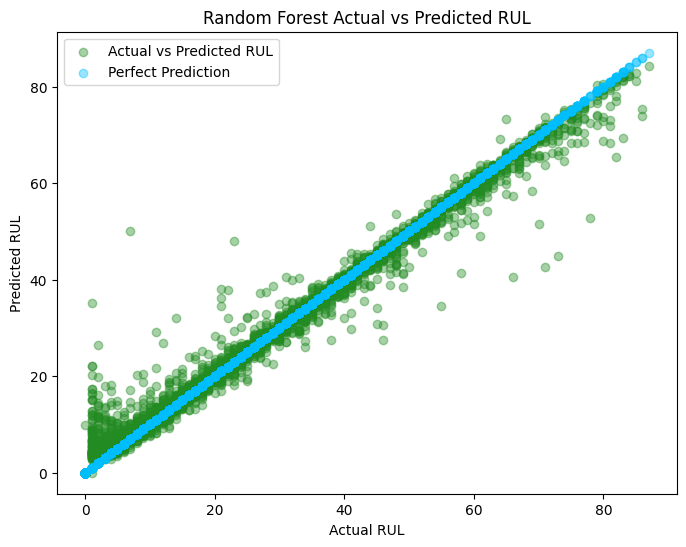

In [114]:
plot_actual_vs_predicted(y_test, y_pred_rfr, title='Random Forest Actual vs Predicted RUL', predicted_color='forestgreen', true_color='deepskyblue')

In [118]:
print_summary_statistics(y_pred_rfr)

Summary statistics:

Minimum value: 0.0
Mean: 29.434242530003022
Median: 25.789772727272727
Standard Deviation: 20.02013726250919
Maximum value: 84.1590909090909


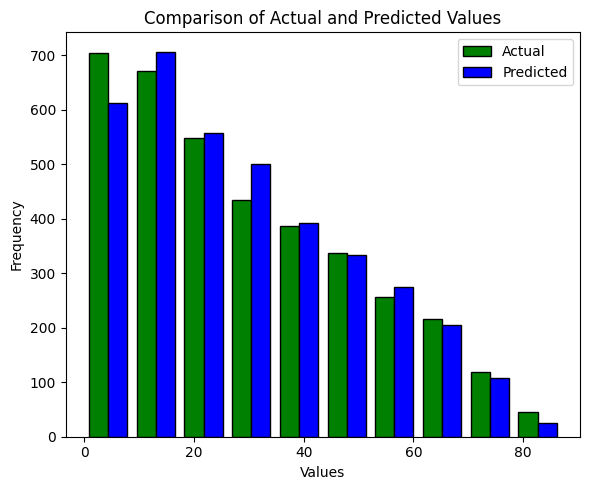

In [119]:
plot_histogram(y_test, y_pred_rfr)